In [5]:
# Step 1: Import necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('retail_sales_data.csv')

# Display the first few rows of the dataset
data.head()


,date,store_id,category,weather,promotion,special_event,dominant_age_group,num_customers,total_sales,online_sales,in_store_sales,avg_transaction,return_rate
0,2023-01-01,store_1,Electronics,Sunny,NaN,False,25-34,137.0,1409.76,430.08,979.68,10.29,0.0453
1,2023-01-01,store_1,Clothing,Rainy,Discount,False,55+,116.0,1612.79,1238.71,374.07,13.90,0.0407
2,2023-01-01,store_1,Groceries,Sunny,Seasonal,False,18-24,120.0,1307.37,168.46,1138.92,10.89,0.0793
3,2023-01-01,store_1,Home Goods,Sunny,Discount,False,55+,132.0,1756.65,220.98,1535.66,13.31,0.0442
4,2023-01-01,store_1,Beauty,Sunny,Seasonal,False,55+,120.0,1764.91,686.24,1078.67,14.71,0.0234


Cleaning Dataset

In [8]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()
missing_values_percentage = (missing_values / len(data)) * 100

# Display the missing values count and percentage
missing_values, missing_values_percentage


(date                     0
 store_id                 0
 category                 0
 weather                346
 promotion             3881
 special_event          382
 dominant_age_group     388
 num_customers          398
 total_sales            358
 online_sales           354
 in_store_sales         388
 avg_transaction        374
 return_rate            357
 dtype: int64,
 date                   0.000000
 store_id               0.000000
 category               0.000000
 weather                1.895890
 promotion             21.265753
 special_event          2.093151
 dominant_age_group     2.126027
 num_customers          2.180822
 total_sales            1.961644
 online_sales           1.939726
 in_store_sales         2.126027
 avg_transaction        2.049315
 return_rate            1.956164
 dtype: float64)

In [10]:
# Handle missing values
# For numerical columns, fill missing values with the median (robust to outliers)
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

# For categorical columns, fill missing values with the mode (most frequent value)
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Verify missing values are handled
data.isnull().sum()


C:\Users\Dell\AppData\Local\Temp\ipykernel_24628\511521272.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])


date                  0
store_id              0
category              0
weather               0
promotion             0
special_event         0
dominant_age_group    0
num_customers         0
total_sales           0
online_sales          0
in_store_sales        0
avg_transaction       0
return_rate           0
dtype: int64

In [16]:
data.dtypes

date                  datetime64[ns]
store_id                      object
category                      object
weather                       object
promotion                     object
special_event                   bool
dominant_age_group            object
num_customers                float64
total_sales                  float64
online_sales                 float64
in_store_sales               float64
avg_transaction              float64
return_rate                  float64
dtype: object

In [12]:
# Convert the 'date' column to datetime
data['date'] = pd.to_datetime(data['date'])

# Verify the conversion
data.dtypes


date                  datetime64[ns]
store_id                      object
category                      object
weather                       object
promotion                     object
special_event                   bool
dominant_age_group            object
num_customers                float64
total_sales                  float64
online_sales                 float64
in_store_sales               float64
avg_transaction              float64
return_rate                  float64
dtype: object

In [14]:
data

,date,store_id,category,weather,promotion,special_event,dominant_age_group,num_customers,total_sales,online_sales,in_store_sales,avg_transaction,return_rate
0,2023-01-01,store_1,Electronics,Sunny,Flash Sale,False,25-34,137.0,1409.76,430.08,979.68,10.29,0.0453
1,2023-01-01,store_1,Clothing,Rainy,Discount,False,55+,116.0,1612.79,1238.71,374.07,13.90,0.0407
2,2023-01-01,store_1,Groceries,Sunny,Seasonal,False,18-24,120.0,1307.37,168.46,1138.92,10.89,0.0793
3,2023-01-01,store_1,Home Goods,Sunny,Discount,False,55+,132.0,1756.65,220.98,1535.66,13.31,0.0442
4,2023-01-01,store_1,Beauty,Sunny,Seasonal,False,55+,120.0,1764.91,686.24,1078.67,14.71,0.0234
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18245,2023-12-31,store_10,Electronics,Snowy,Seasonal,False,18-24,101.0,1545.95,969.54,576.41,15.31,0.0519
18246,2023-12-31,store_10,Clothing,Windy,Flash Sale,False,18-24,160.0,1721.38,1157.01,564.37,10.76,0.0500
18247,2023-12-31,store_10,Groceries,Sunny,BOGO,False,45-54,187.0,2787.41,1007.79,1779.62,14.91,0.0191
18248,2023-12-31,store_10,Home Goods,Cloudy,BOGO,False,35-44,148.0,866.32,412.21,454.12,5.85,0.0382


# Exploratory Data Analysis (EDA)

In [19]:
# Summary statistics for numerical columns
data.describe()


,date,num_customers,total_sales,online_sales,in_store_sales,avg_transaction,return_rate
count,18250,18250.000000,18250.000000,18250.000000,18250.000000,18250.000000,18250.000000
mean,2023-07-01 23:59:59.999999744,106.149863,1310.485333,525.701383,784.139227,12.477143,0.049980
min,2023-01-01 00:00:00,51.000000,250.010000,2.000000,13.260000,2.620000,-0.026900
25%,2023-04-02 00:00:00,90.000000,1021.745000,290.207500,521.640000,10.170000,0.036725
50%,2023-07-02 00:00:00,102.000000,1257.690000,469.340000,737.240000,12.210000,0.050000
75%,2023-10-01 00:00:00,118.000000,1531.377500,696.367500,991.282500,14.490000,0.063100
max,2023-12-31 00:00:00,285.000000,4202.360000,3371.680000,3178.170000,27.860000,0.136600
std,NaN,24.088910,414.329864,320.583240,366.816381,3.278111,0.019844


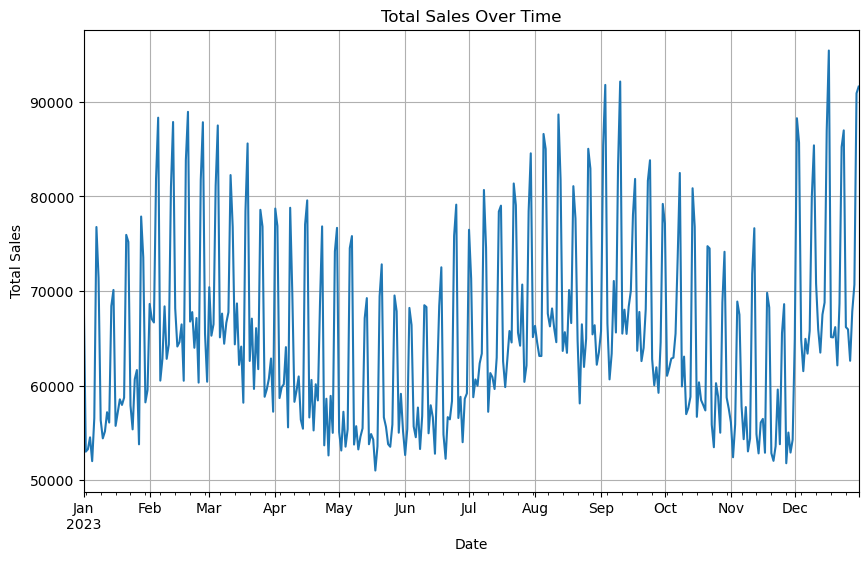

In [21]:
import matplotlib.pyplot as plt

# Plot the total sales over time
plt.figure(figsize=(10, 6))
data.groupby('date')['total_sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


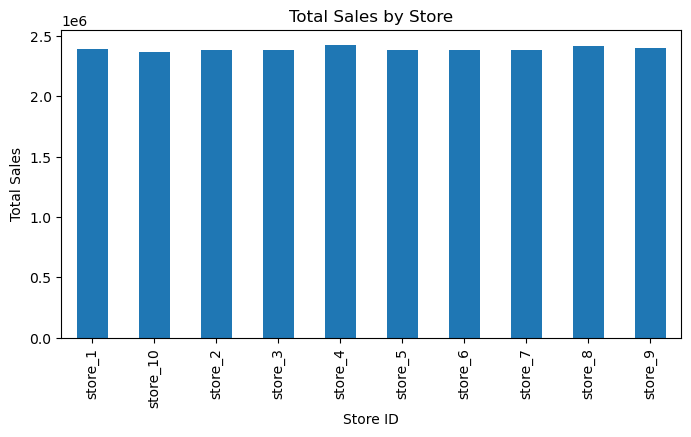

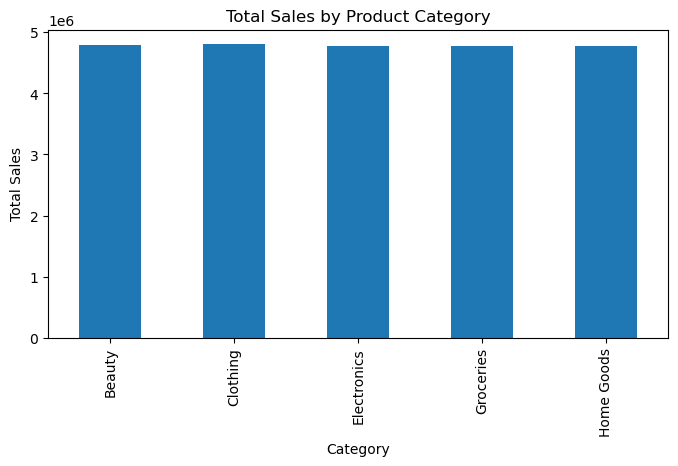

In [29]:
# Total sales by store
plt.figure(figsize=(8, 4))
data.groupby('store_id')['total_sales'].sum().plot(kind='bar')
plt.title('Total Sales by Store')
plt.xlabel('Store ID')
plt.ylabel('Total Sales')
plt.show()

# Total sales by category
plt.figure(figsize=(8, 4))
data.groupby('category')['total_sales'].sum().plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()


Correlation Heatmap

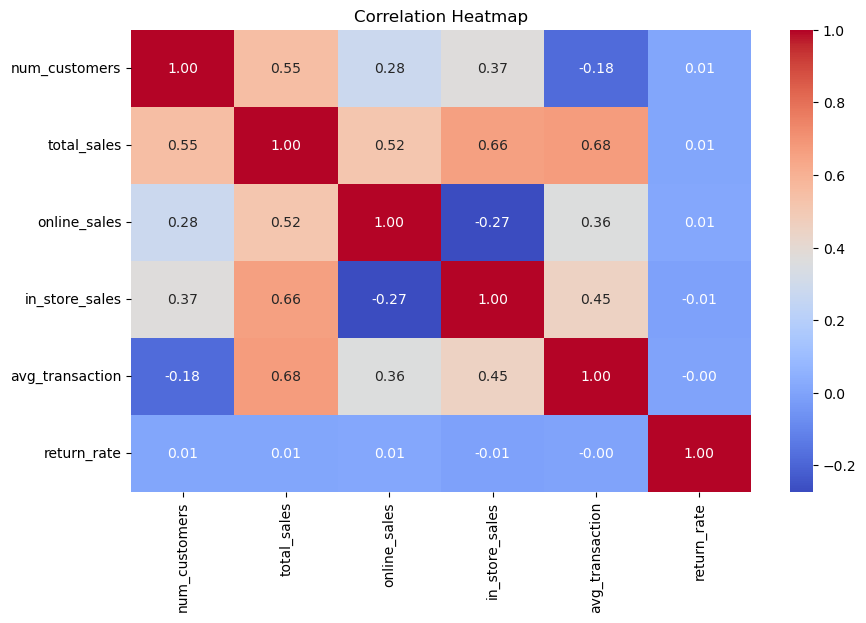

In [34]:
# Select only numerical columns for correlation
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numerical_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [36]:
# Extract day of the week, month, and whether it's a weekend
data['day_of_week'] = data['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
data['month'] = data['date'].dt.month
data['is_weekend'] = data['day_of_week'].isin([5, 6]).astype(int)

# Display the new columns
data[['date', 'day_of_week', 'month', 'is_weekend']].head()


,date,day_of_week,month,is_weekend
0,2023-01-01,6,1,1
1,2023-01-01,6,1,1
2,2023-01-01,6,1,1
3,2023-01-01,6,1,1
4,2023-01-01,6,1,1


In [38]:
# One-hot encoding for categorical columns
data_encoded = pd.get_dummies(data, columns=['store_id', 'category', 'weather', 'dominant_age_group'], drop_first=True)

# Check the encoded data
data_encoded.head()


,date,promotion,special_event,num_customers,total_sales,online_sales,in_store_sales,avg_transaction,return_rate,day_of_week,...,category_Groceries,category_Home Goods,weather_Rainy,weather_Snowy,weather_Sunny,weather_Windy,dominant_age_group_25-34,dominant_age_group_35-44,dominant_age_group_45-54,dominant_age_group_55+
0,2023-01-01,Flash Sale,False,137.0,1409.76,430.08,979.68,10.29,0.0453,6,...,False,False,False,False,True,False,True,False,False,False
1,2023-01-01,Discount,False,116.0,1612.79,1238.71,374.07,13.90,0.0407,6,...,False,False,True,False,False,False,False,False,False,True
2,2023-01-01,Seasonal,False,120.0,1307.37,168.46,1138.92,10.89,0.0793,6,...,True,False,False,False,True,False,False,False,False,False
3,2023-01-01,Discount,False,132.0,1756.65,220.98,1535.66,13.31,0.0442,6,...,False,True,False,False,True,False,False,False,False,True
4,2023-01-01,Seasonal,False,120.0,1764.91,686.24,1078.67,14.71,0.0234,6,...,False,False,False,False,True,False,False,False,False,True


In [40]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns for scaling
numerical_cols = ['num_customers', 'total_sales', 'online_sales', 'in_store_sales', 'avg_transaction', 'return_rate']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling to the numerical columns
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

# Check the scaled data
data_encoded.head()


,date,promotion,special_event,num_customers,total_sales,online_sales,in_store_sales,avg_transaction,return_rate,day_of_week,...,category_Groceries,category_Home Goods,weather_Rainy,weather_Snowy,weather_Sunny,weather_Windy,dominant_age_group_25-34,dominant_age_group_35-44,dominant_age_group_45-54,dominant_age_group_55+
0,2023-01-01,Flash Sale,False,1.280713,0.239610,-0.298281,0.533090,-0.667214,-0.235819,6,...,False,False,False,False,True,False,True,False,False,False
1,2023-01-01,Discount,False,0.408919,0.729643,2.224159,-1.117945,0.434060,-0.467631,6,...,False,False,True,False,False,False,False,False,False,True
2,2023-01-01,Seasonal,False,0.574975,-0.007519,-1.114379,0.967216,-0.484177,1.477576,6,...,True,False,False,False,True,False,False,False,False,False
3,2023-01-01,Discount,False,1.073143,1.076864,-0.950548,2.048822,0.254073,-0.291252,6,...,False,True,False,False,True,False,False,False,False,True
4,2023-01-01,Seasonal,False,0.574975,1.096800,0.500784,0.802960,0.681160,-1.339447,6,...,False,False,False,False,True,False,False,False,False,True


In [46]:
# Step 1: Group data by store_id, category, and date, and aggregate the total sales and other relevant features
store_category_sales = data.groupby(['store_id', 'category', 'date']).agg({
    'total_sales': 'sum',  # Aggregate total_sales as the sum
    'num_customers': 'mean',  # Use mean for num_customers
    'avg_transaction': 'mean',  # Use mean for avg_transaction
    'online_sales': 'mean',  # Use mean for online_sales
    'in_store_sales': 'mean',  # Use mean for in_store_sales
    'return_rate': 'mean'  # Use mean for return_rate
}).reset_index()

# Step 2: Extract temporal features (like day_of_week, month, is_weekend) for the forecasting model
store_category_sales['day_of_week'] = store_category_sales['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
store_category_sales['month'] = store_category_sales['date'].dt.month
store_category_sales['is_weekend'] = store_category_sales['day_of_week'].isin([5, 6]).astype(int)

# Step 3: Create the feature set (X) and target variable (y)
X = store_category_sales[['num_customers', 'avg_transaction', 'online_sales', 'in_store_sales', 'return_rate', 'day_of_week', 'month', 'is_weekend']]

# Target variable: total_sales
y = store_category_sales['total_sales']

# Step 4: Train-test split (80% for training, 20% for testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
# Step 1: Train a Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Step 2: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared (R2)
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 4462.218630069415
R-squared: 0.9752440795652023


In [50]:
# Step 2: Prepare features for the forecast (same as training features)
forecast_dates = pd.date_range('2024-01-01', '2024-01-14', freq='D')

# Create a dataframe with all store-category combinations for the forecast dates
store_category_combinations = store_category_sales[['store_id', 'category']].drop_duplicates()

# Create a dataframe with all combinations and the forecast dates
forecast_data = pd.MultiIndex.from_product([store_category_combinations['store_id'].unique(),
                                            store_category_combinations['category'].unique(),
                                            forecast_dates],
                                           names=['store_id', 'category', 'date'])

forecast_df = pd.DataFrame(index=forecast_data).reset_index()

# Add relevant features to the forecast dataframe (placeholders for forecasting)
forecast_df['num_customers'] = 100  # placeholder value for forecasting
forecast_df['avg_transaction'] = 15  # placeholder value
forecast_df['online_sales'] = 0.5  # 50% of sales from online channels
forecast_df['in_store_sales'] = 0.5  # 50% from in-store sales
forecast_df['return_rate'] = 0.05  # placeholder return rate (5%)
forecast_df['day_of_week'] = forecast_df['date'].dt.dayofweek
forecast_df['month'] = forecast_df['date'].dt.month
forecast_df['is_weekend'] = forecast_df['day_of_week'].isin([5, 6]).astype(int)

# Predict total sales for the forecast data
forecast_features = forecast_df[['num_customers', 'avg_transaction', 'online_sales', 'in_store_sales', 'return_rate', 'day_of_week', 'month', 'is_weekend']]
forecast_sales = rf_model.predict(forecast_features)

# Add the predicted sales to the dataframe
forecast_df['predicted_sales'] = forecast_sales

# Display the forecasted data for the first few rows
forecast_df[['store_id', 'category', 'date', 'predicted_sales']].head()


,store_id,category,date,predicted_sales
0,store_1,Beauty,2024-01-01,823.9370
1,store_1,Beauty,2024-01-02,823.6674
2,store_1,Beauty,2024-01-03,822.8498
3,store_1,Beauty,2024-01-04,821.7365
4,store_1,Beauty,2024-01-05,823.5316


In [52]:
# Step 3: Analyze feature importance
feature_importance = rf_model.feature_importances_

# Create a dataframe to display the feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
importance_df


,Feature,Importance
3,in_store_sales,0.348536
2,online_sales,0.270374
1,avg_transaction,0.207389
0,num_customers,0.167034
4,return_rate,0.003211
6,month,0.001702
5,day_of_week,0.001396
7,is_weekend,0.000359


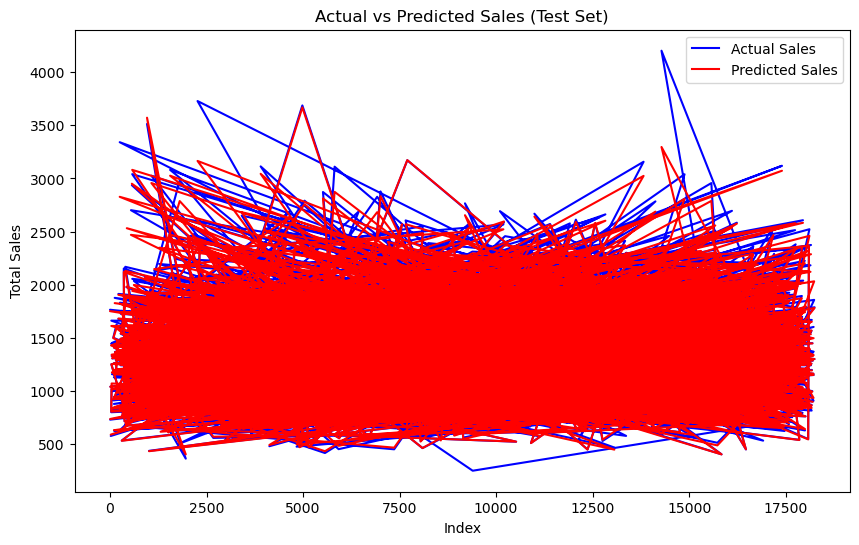

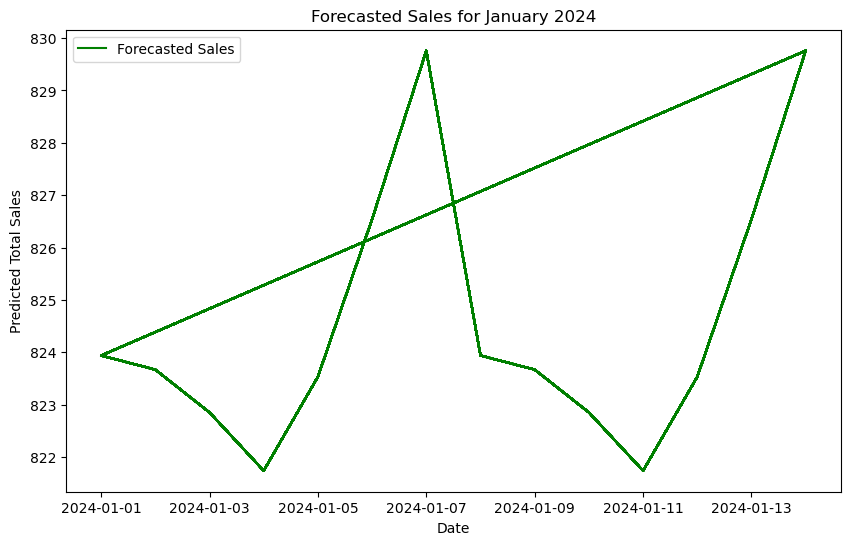

In [54]:
# Step 4: Visualize the predictions on the test set (Actual vs Predicted)
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual Sales', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Sales', color='red')
plt.title('Actual vs Predicted Sales (Test Set)')
plt.xlabel('Index')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

# Step 5: Visualize the forecasted sales for January 2024
plt.figure(figsize=(10, 6))
plt.plot(forecast_df['date'], forecast_df['predicted_sales'], label='Forecasted Sales', color='green')
plt.title('Forecasted Sales for January 2024')
plt.xlabel('Date')
plt.ylabel('Predicted Total Sales')
plt.legend()
plt.show()


# Testing Different Models

In [58]:
from sklearn.linear_model import LinearRegression

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate the model
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr}, R-squared: {r2_lr}")


Linear Regression - MSE: 5224.053006747004, R-squared: 0.9710175024346168


In [64]:
!pip install xgboost
import xgboost as xgb

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb}, R-squared: {r2_xgb}")


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 4.5 MB/s eta 0:00:34
    --------------------------------------- 2.9/150.0 MB 6.2 MB/s eta 0:00:24
   - -------------------------------------- 5.0/150.0 MB 7.4 MB/s eta 0:00:20
   - -------------------------------------- 5.0/150.0 MB 7.4 MB/s eta 0:00:20
   - -------------------------------------- 5.8/150.0 MB 5.3 MB/s eta 0:00:28
   - -------------------------------------- 5.8/150.0 MB 5.3 MB/s eta 0:00:28
   - -------------------------------------- 6.0/150.0 MB 4.2 MB/s eta 0:00:35
   - -------------------------------------- 6.8/150.0 MB 4.0 MB/s eta 0:00:36
   -- ------------------------------------- 7.6/150.0 MB 3.9 MB/s eta 0:00:37
   -- ------------------------------------- 8.1/150.0 MB 3.9 MB/s eta 0:00:37
   -- ------------------------------------- 8.4/150.0 MB 3.5 MB/s eta 0:00:41


In [66]:
from sklearn.svm import SVR

# Train the Support Vector Machine model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)

# Evaluate the model
y_pred_svm = svm_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"SVM - MSE: {mse_svm}, R-squared: {r2_svm}")


SVM - MSE: 25976.49908198315, R-squared: 0.8558851105782401


In [68]:
from sklearn.neural_network import MLPRegressor

# Train the Neural Network model
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Evaluate the model
y_pred_nn = nn_model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network - MSE: {mse_nn}, R-squared: {r2_nn}")


Neural Network - MSE: 5779.351350906187, R-squared: 0.9679367655265362


In [72]:
# Importing required libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming 'X' and 'y' are already defined from previous steps (features and target)
# X_train, X_test, y_train, y_test should also be defined from previous steps

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Linear Regression': LinearRegression(),
    'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
    'SVM': SVR(kernel='rbf'),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Store results
results = []

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        'Model': model_name,
        'MSE': mse,
        'R-squared': r2
    })

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(results)

# Sort by R-squared (higher is better) and display the comparison
comparison_df = comparison_df.sort_values(by='R-squared', ascending=False)
comparison_df


,Model,MSE,R-squared
0,Random Forest,4462.218630,0.975244
1,Linear Regression,5224.053007,0.971018
2,XGBoost,5416.397659,0.969950
4,Neural Network,5779.351351,0.967937
3,SVM,25976.499082,0.855885


Hyper PARAMETER TUNING FOR RANDOM FOREST

In [75]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at each split
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-validation Score: {best_score}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
513 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Dell\anaconda3\Lib\site-packages\s

Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Score: -5797.458867070302


In [76]:
# Example: Apply log transformation to total_sales if it's skewed
import numpy as np

# Apply log transformation
data['log_total_sales'] = np.log1p(data['total_sales'])  # log1p is log(1 + x), which handles zero values


In [77]:
# Get feature importances from the trained Random Forest model
importances = grid_search.best_estimator_.feature_importances_

# Create a DataFrame with features and their importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)


           Feature  Importance
1  avg_transaction    0.311454
3   in_store_sales    0.266074
0    num_customers    0.194907
2     online_sales    0.169761
7       is_weekend    0.023683
5      day_of_week    0.020886
4      return_rate    0.007550
6            month    0.005685


In [78]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print the average MSE across all folds
print(f"Cross-validated MSE: {-cv_scores.mean()}")


Cross-validated MSE: 5339.648423708648


In [79]:
# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_

# Make predictions
y_pred = best_rf_model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Improved MSE: {mse}")
print(f"Improved R-squared: {r2}")


Improved MSE: 5098.235947982986
Improved R-squared: 0.9717155222660776


In [85]:
# Define simpler parameter grid
param_grid_simple = {
    'n_estimators': [100],  # Fewer trees
    'max_depth': [10, 15],  # Shallower trees
    'min_samples_split': [2, 5], 
    'min_samples_leaf': [5, 10],
    'max_features': ['sqrt']
}

# Initialize GridSearchCV with simpler parameter grid
grid_search_simple = GridSearchCV(estimator=rf_model, param_grid=param_grid_simple, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search_simple.fit(X_train, y_train)

# Get best parameters and score
best_params_simple = grid_search_simple.best_params_
best_score_simple = grid_search_simple.best_score_

print(f"Best Parameters (Simplified): {best_params_simple}")
print(f"Best Cross-validation Score (Simplified): {best_score_simple}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters (Simplified): {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Score (Simplified): -8084.701836307902


In [87]:
# Example: Apply log transformation to skewed data (e.g., total_sales)
import numpy as np
data['log_total_sales'] = np.log1p(data['total_sales'])  # log1p handles zero values as well

# Interaction term: Multiply num_customers and avg_transaction to get an idea of purchasing power
data['customer_spend'] = data['num_customers'] * data['avg_transaction']

# Adding more temporal features
data['quarter'] = data['date'].dt.quarter  # Quarter of the year
data['is_holiday'] = data['date'].isin(pd.to_datetime(['2023-12-25', '2023-01-01']))  # Holiday flag (example)


In [89]:
# Identify outliers using Z-score or IQR method
from scipy import stats

# Z-score method: Data points with z-scores > 3 can be considered as outliers
z_scores = np.abs(stats.zscore(data[['total_sales', 'num_customers', 'avg_transaction']]))
outliers = (z_scores > 3).all(axis=1)

# Remove outliers
data_cleaned = data[~outliers]


In [91]:
import xgboost as xgb

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb}, R-squared: {r2_xgb}")


XGBoost - MSE: 5416.397659453229, R-squared: 0.9699503944972407


In [93]:
from sklearn.svm import SVR

# Initialize the SVM model
svm_model = SVR(kernel='rbf')

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_svm = svm_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print(f"SVM - MSE: {mse_svm}, R-squared: {r2_svm}")


SVM - MSE: 25976.49908198315, R-squared: 0.8558851105782401


In [94]:
from sklearn.neural_network import MLPRegressor

# Initialize the Neural Network model
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Train the Neural Network model
nn_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_nn = nn_model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network - MSE: {mse_nn}, R-squared: {r2_nn}")


Neural Network - MSE: 5779.351350906187, R-squared: 0.9679367655265362


In [95]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Grid search for hyperparameters
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print(f"Best XGBoost Parameters: {best_params_xgb}")
print(f"Best XGBoost Cross-validation Score: {best_score_xgb}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1

In [96]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0]
}

# Initialize XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Grid search for hyperparameters
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_xgb.fit(X_train, y_train)

# Get the best parameters and best score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print(f"Best XGBoost Parameters: {best_params_xgb}")
print(f"Best XGBoost Cross-validation Score: {best_score_xgb}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1

In [97]:
# Define the parameter grid for Neural Networks
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'max_iter': [500, 1000]
}

# Initialize the Neural Network model
nn_model = MLPRegressor(random_state=42)

# Grid search for hyperparameters
grid_search_nn = GridSearchCV(nn_model, param_grid_nn, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_nn.fit(X_train, y_train)

# Get the best parameters and best score
best_params_nn = grid_search_nn.best_params_
best_score_nn = grid_search_nn.best_score_

print(f"Best Neural Network Parameters: {best_params_nn}")
print(f"Best Neural Network Cross-validation Score: {best_score_nn}")


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=500; total time=   6.1s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=500; total time=   7.4s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=500; total time=  10.2s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=500; total time=   9.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=500; total time=  10.7s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=1000; total time=   8.5s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=1000; total time=   8.2s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=1000; total time=   8.4s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=1000; total time=   9.8s
[CV] END activation=relu, hidden_layer_sizes=(50,), max_iter=1000; total time=  11.4s
[CV] END activation=relu, hidden_layer_sizes=(100,), max_iter=500; total time=   9.1

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=500; total time=  25.8s


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=500; total time=  21.1s


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=500; total time=  23.6s


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=500; total time=  25.1s


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=500; total time=  24.0s


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=1000; total time=  56.9s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=1000; total time= 1.1min
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=1000; total time=  41.4s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=1000; total time=  34.9s


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=1000; total time= 1.2min


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500; total time= 1.2min


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500; total time=  42.0s


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500; total time=  38.2s


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500; total time=  35.5s


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=500; total time=  34.3s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000; total time=  42.0s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000; total time=  43.2s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000; total time=  42.4s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000; total time=  52.6s
[CV] END activation=tanh, hidden_layer_sizes=(100,), max_iter=1000; total time=  52.2s


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(150,), max_iter=500; total time=  43.5s
[CV] END activation=tanh, hidden_layer_sizes=(150,), max_iter=500; total time=  38.8s


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(150,), max_iter=500; total time=  44.1s
[CV] END activation=tanh, hidden_layer_sizes=(150,), max_iter=500; total time=  44.7s


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END activation=tanh, hidden_layer_sizes=(150,), max_iter=500; total time=  46.6s
[CV] END activation=tanh, hidden_layer_sizes=(150,), max_iter=1000; total time= 1.0min
[CV] END activation=tanh, hidden_layer_sizes=(150,), max_iter=1000; total time=  40.1s
[CV] END activation=tanh, hidden_layer_sizes=(150,), max_iter=1000; total time=  59.7s
[CV] END activation=tanh, hidden_layer_sizes=(150,), max_iter=1000; total time=  39.5s
[CV] END activation=tanh, hidden_layer_sizes=(150,), max_iter=1000; total time=  48.9s
Best Neural Network Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'max_iter': 500}
Best Neural Network Cross-validation Score: -7137.003758309421


In [100]:
# Evaluate each model and store the results
from sklearn.metrics import mean_squared_error, r2_score

# Random Forest Model Evaluation
rf_model = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_leaf=5, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# XGBoost Model Evaluation
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# SVM Model Evaluation
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Neural Network Model Evaluation
nn_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

# Store all models and evaluation results in a dictionary for easy comparison
model_results = {
    'Random Forest': {'MSE': mse_rf, 'R-squared': r2_rf},
    'XGBoost': {'MSE': mse_xgb, 'R-squared': r2_xgb},
    'SVM': {'MSE': mse_svm, 'R-squared': r2_svm},
    'Neural Network': {'MSE': mse_nn, 'R-squared': r2_nn}
}

# Convert to DataFrame for better visualization
comparison_df = pd.DataFrame(model_results).T

# Sort by R-squared to see which model performs be


# Customer Segmentation

In [105]:
# Select only the numerical columns for filling missing values
numerical_columns = ['total_sales', 'num_customers', 'avg_transaction', 'online_sales', 'in_store_sales']

# Handle missing values by filling them with the median for numerical features
segmentation_data[numerical_columns] = segmentation_data[numerical_columns].fillna(segmentation_data[numerical_columns].median())

# You can also perform log transformations on skewed data like total_sales
segmentation_data['log_total_sales'] = np.log1p(segmentation_data['total_sales'])

# Normalize the data (scaling features to a similar range)
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(segmentation_data[['log_total_sales', 'num_customers', 'avg_transaction', 'online_sales', 'in_store_sales']])

# Add the standardized features back to the dataframe
segmentation_data[['scaled_log_total_sales', 'scaled_num_customers', 'scaled_avg_transaction', 'scaled_online_sales', 'scaled_in_store_sales']] = scaled_features

# Display the prepared data
segmentation_data.head()


C:\Users\Dell\AppData\Local\Temp\ipykernel_24628\3187800210.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmentation_data[numerical_columns] = segmentation_data[numerical_columns].fillna(segmentation_data[numerical_columns].median())
C:\Users\Dell\AppData\Local\Temp\ipykernel_24628\3187800210.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmentation_data['log_total_sales'] = np.log1p(segmentation_data['total_sales'])
C:\Users\Dell\AppData\Local\Temp\ipykernel_24628\3187800210.py:18: SettingWi

,store_id,category,total_sales,num_customers,avg_transaction,online_sales,in_store_sales,log_total_sales,scaled_log_total_sales,scaled_num_customers,scaled_avg_transaction,scaled_online_sales,scaled_in_store_sales
0,store_1,Electronics,1409.76,137.0,10.29,430.08,979.68,7.251884,0.388172,1.280713,-0.667214,-0.298281,0.533090
1,store_1,Clothing,1612.79,116.0,13.90,1238.71,374.07,7.386341,0.819104,0.408919,0.434060,2.224159,-1.117945
2,store_1,Groceries,1307.37,120.0,10.89,168.46,1138.92,7.176537,0.146688,0.574975,-0.484177,-1.114379,0.967216
3,store_1,Home Goods,1756.65,132.0,13.31,220.98,1535.66,7.471733,1.092785,1.073143,0.254073,-0.950548,2.048822
4,store_1,Beauty,1764.91,120.0,14.71,686.24,1078.67,7.476421,1.107811,0.574975,0.681160,0.500784,0.802960


C:\Users\Dell\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Dell\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Dell\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Dell\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Dell\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

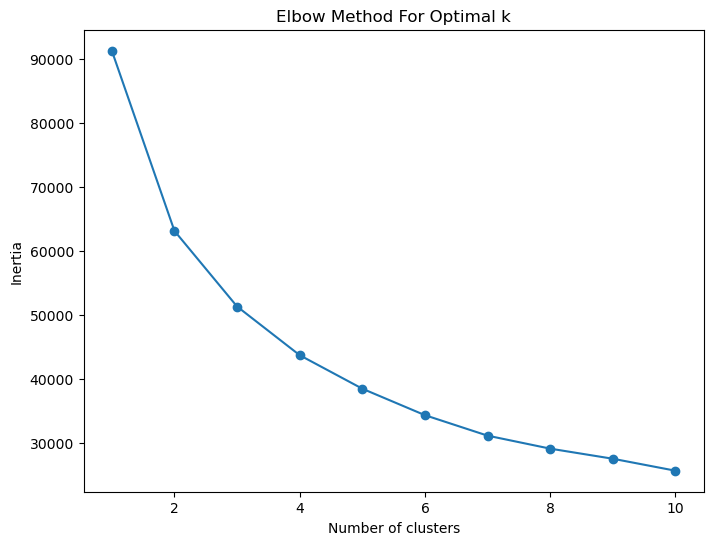

In [107]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Elbow method to find the optimal number of clusters
inertia = []
for k in range(1, 11):  # Try from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the inertia to visualize the "elbow"
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [109]:
# Fit the K-Means model with the optimal number of clusters (e.g., k=4)
kmeans = KMeans(n_clusters=4, random_state=42)
segmentation_data['cluster'] = kmeans.fit_predict(scaled_features)

# Display the resulting clusters
segmentation_data.head()


C:\Users\Dell\AppData\Local\Temp\ipykernel_24628\2794880239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmentation_data['cluster'] = kmeans.fit_predict(scaled_features)


,store_id,category,total_sales,num_customers,avg_transaction,online_sales,in_store_sales,log_total_sales,scaled_log_total_sales,scaled_num_customers,scaled_avg_transaction,scaled_online_sales,scaled_in_store_sales,cluster
0,store_1,Electronics,1409.76,137.0,10.29,430.08,979.68,7.251884,0.388172,1.280713,-0.667214,-0.298281,0.533090,3
1,store_1,Clothing,1612.79,116.0,13.90,1238.71,374.07,7.386341,0.819104,0.408919,0.434060,2.224159,-1.117945,0
2,store_1,Groceries,1307.37,120.0,10.89,168.46,1138.92,7.176537,0.146688,0.574975,-0.484177,-1.114379,0.967216,3
3,store_1,Home Goods,1756.65,132.0,13.31,220.98,1535.66,7.471733,1.092785,1.073143,0.254073,-0.950548,2.048822,3
4,store_1,Beauty,1764.91,120.0,14.71,686.24,1078.67,7.476421,1.107811,0.574975,0.681160,0.500784,0.802960,3


In [113]:
# Exclude non-numeric columns from the dataset for the groupby operation
numeric_columns = ['scaled_log_total_sales', 'scaled_num_customers', 'scaled_avg_transaction', 'scaled_online_sales', 'scaled_in_store_sales']

# Now, group by the 'cluster' and calculate mean values only for numeric columns
cluster_summary = segmentation_data.groupby('cluster')[numeric_columns].mean()

# Display the summary of each cluster
print(cluster_summary)


         scaled_log_total_sales  scaled_num_customers  scaled_avg_transaction  \
cluster                                                                         
0                      0.753587              0.357530                0.559976   
1                     -0.952154             -0.285065               -0.853161   
2                      0.177131             -0.544371                0.615310   
3                      1.108960              1.321500                0.255219   

         scaled_online_sales  scaled_in_store_sales  
cluster                                              
0                   1.533018              -0.495145  
1                  -0.404322              -0.642051  
2                  -0.382634               0.385002  
3                  -0.142878               1.473671  


In [115]:
# Get the centroids of each cluster (mean of features for each cluster)
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['scaled_log_total_sales', 'scaled_num_customers', 'scaled_avg_transaction', 'scaled_online_sales', 'scaled_in_store_sales'])

# Display the centroids
print(cluster_centroids)


   scaled_log_total_sales  scaled_num_customers  scaled_avg_transaction  \
0                0.754119              0.359486                0.559377   
1               -0.952594             -0.284080               -0.854175   
2                0.175828             -0.545236                0.614303   
3                1.109680              1.318048                0.258064   

   scaled_online_sales  scaled_in_store_sales  
0             1.533852              -0.495229  
1            -0.404516              -0.642233  
2            -0.381439               0.382484  
3            -0.143233               1.474739  


In [117]:
# Generate actionable insights based on cluster analysis
cluster_insights = {
    0: "Cluster 0: High total sales, low customer count. Focus on increasing customer engagement and enhancing online sales.",
    1: "Cluster 1: Low total sales, low customer count. Focus on increasing store traffic, promotions, and improving in-store experience.",
    2: "Cluster 2: High customer count, moderate sales. Focus on increasing average transaction value, cross-selling, and improving customer experience.",
    3: "Cluster 3: Moderate sales and customer count. Focus on optimizing supply chain and improving both in-store and online shopping experience."
}

# Map the insights to the clusters
segmentation_data['insights'] = segmentation_data['cluster'].map(cluster_insights)

# Display the stores with their assigned cluster and insights
segmentation_data[['store_id', 'category', 'cluster', 'insights']].head()


C:\Users\Dell\AppData\Local\Temp\ipykernel_24628\4108494665.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segmentation_data['insights'] = segmentation_data['cluster'].map(cluster_insights)


,store_id,category,cluster,insights
0,store_1,Electronics,3,Cluster 3: Moderate sales and customer count. ...
1,store_1,Clothing,0,"Cluster 0: High total sales, low customer coun..."
2,store_1,Groceries,3,Cluster 3: Moderate sales and customer count. ...
3,store_1,Home Goods,3,Cluster 3: Moderate sales and customer count. ...
4,store_1,Beauty,3,Cluster 3: Moderate sales and customer count. ...


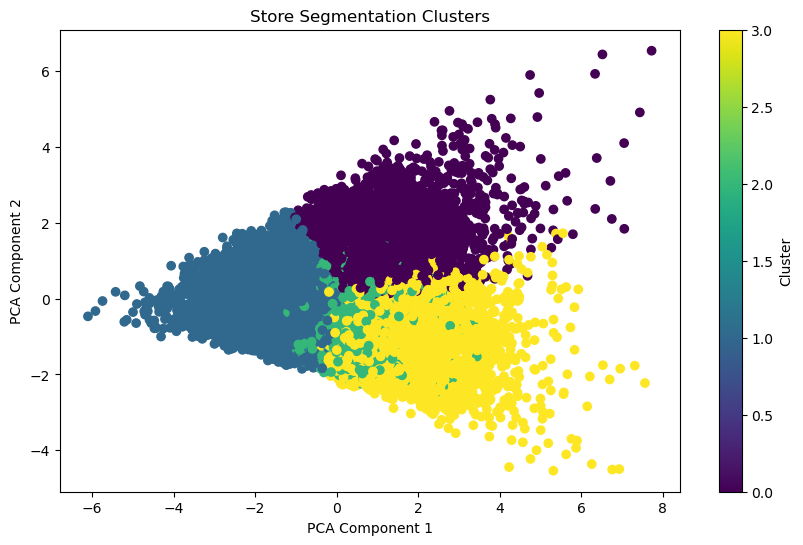

In [119]:
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction (2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Plot the clusters in 2D
plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=segmentation_data['cluster'], cmap='viridis')
plt.title('Store Segmentation Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()
